<a href="https://colab.research.google.com/github/Mostafa-MMK/DerivativePricingModels/blob/main/TimeSeriers_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Modeling

[*********************100%***********************]  1 of 1 completed


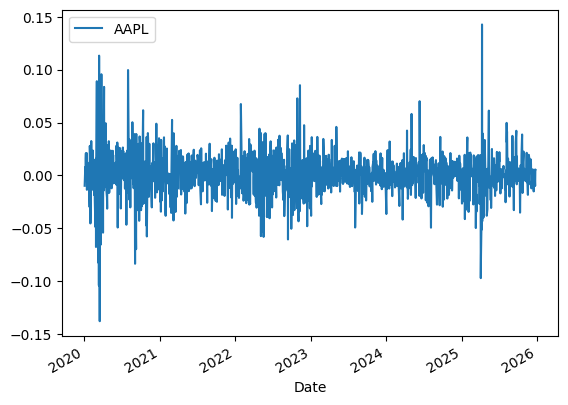

In [8]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


symbols = ['AAPL']
df = yf.download(symbols, auto_adjust = True, start = '2020-01-01')['Close'].dropna()
df.columns = ['AAPL']
df_returns = np.log(df.div(df.shift(1))).dropna()
df_returns.plot()
plt.show()

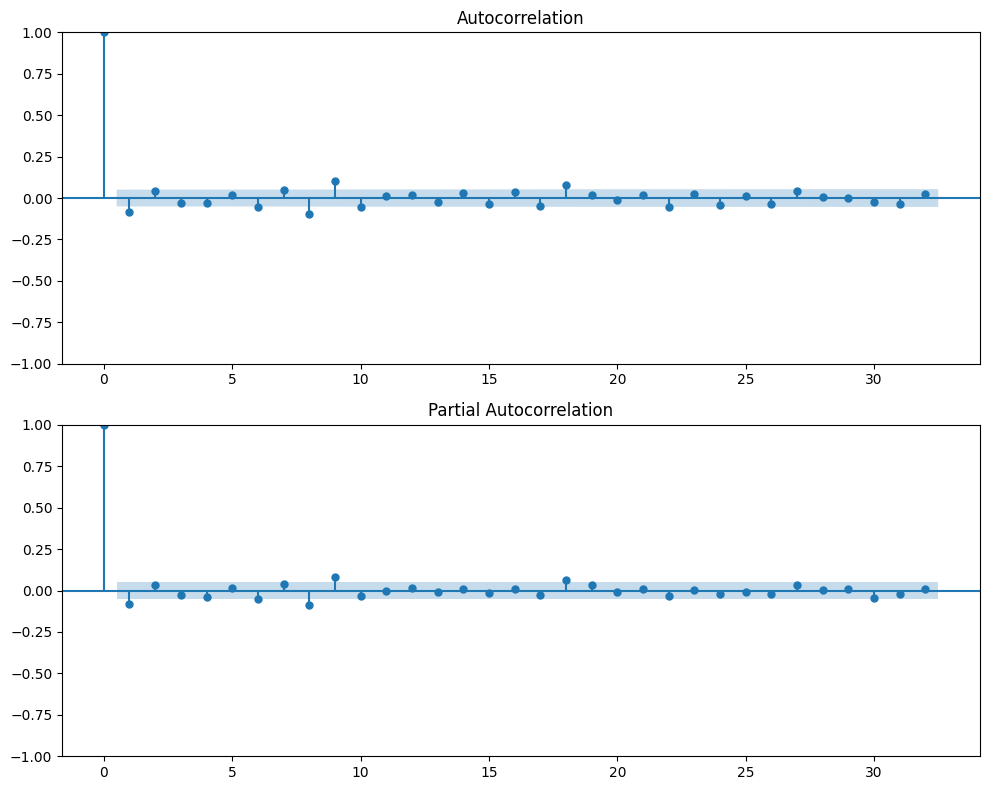

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
plot_acf(df_returns['AAPL'], ax=axes[0])
plot_pacf(df_returns['AAPL'], ax=axes[1])
plt.tight_layout()
plt.show()

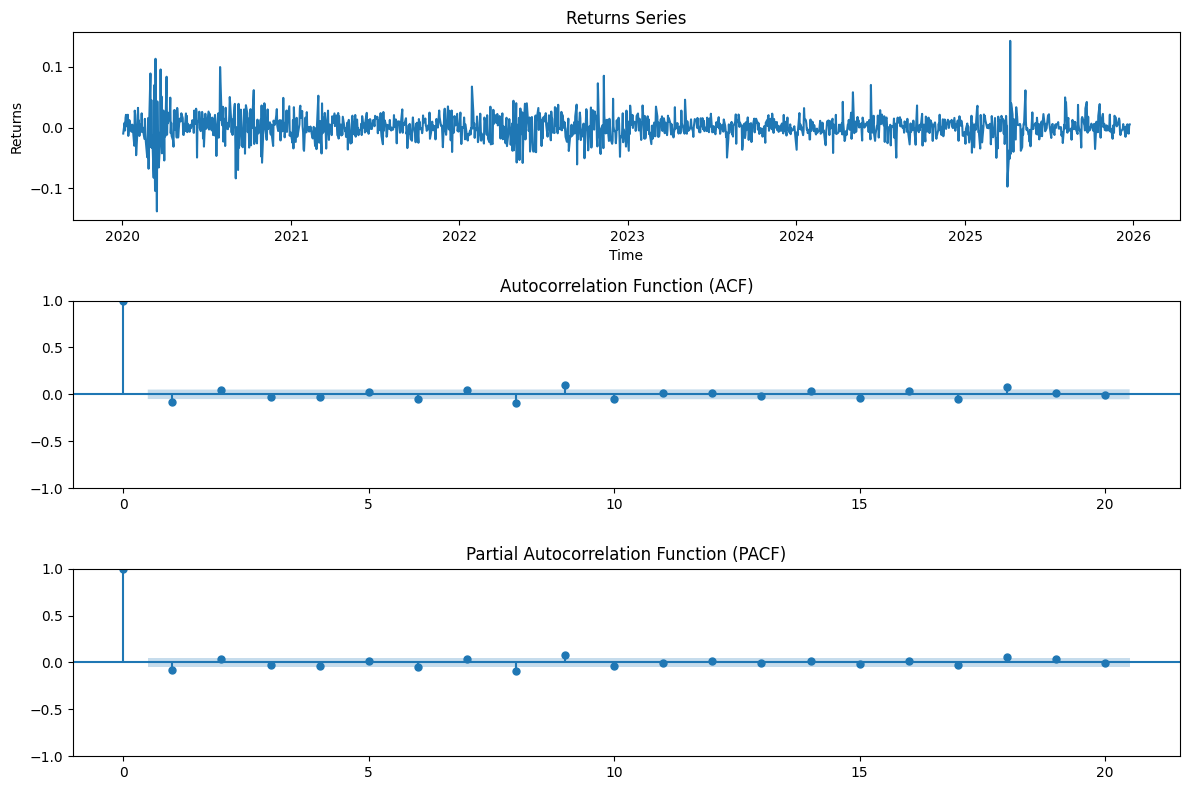

Fitting AR(1)...
Fitting AR(2)...
Fitting AR(3)...
Fitting MA(1)...
Fitting MA(2)...
Fitting MA(3)...
Fitting ARMA(1,1)...

MODEL COMPARISON TABLE (Sorted by AIC)
    Model     Order          AIC          BIC     RMSE      MAE  Ljung-Box p-value  Significant Params
    AR(1) (1, 0, 0) -7496.912379 -7480.966724 0.019942 0.013852           0.000058                   2
    AR(2) (2, 0, 0) -7496.657504 -7475.396631 0.019931 0.013856           0.000265                   3
    MA(3) (0, 0, 3) -7496.574188 -7469.998096 0.019918 0.013860           0.000871                   4
    MA(1) (0, 0, 1) -7496.214833 -7480.269178 0.019947 0.013849           0.000031                   2
    MA(2) (0, 0, 2) -7496.208315 -7474.947441 0.019934 0.013855           0.000193                   3
ARMA(1,1) (1, 0, 1) -7495.846854 -7474.585980 0.019936 0.013861           0.000259                   3
    AR(3) (3, 0, 0) -7495.722035 -7469.145943 0.019924 0.013857           0.000507                   3

DETAILED PAR

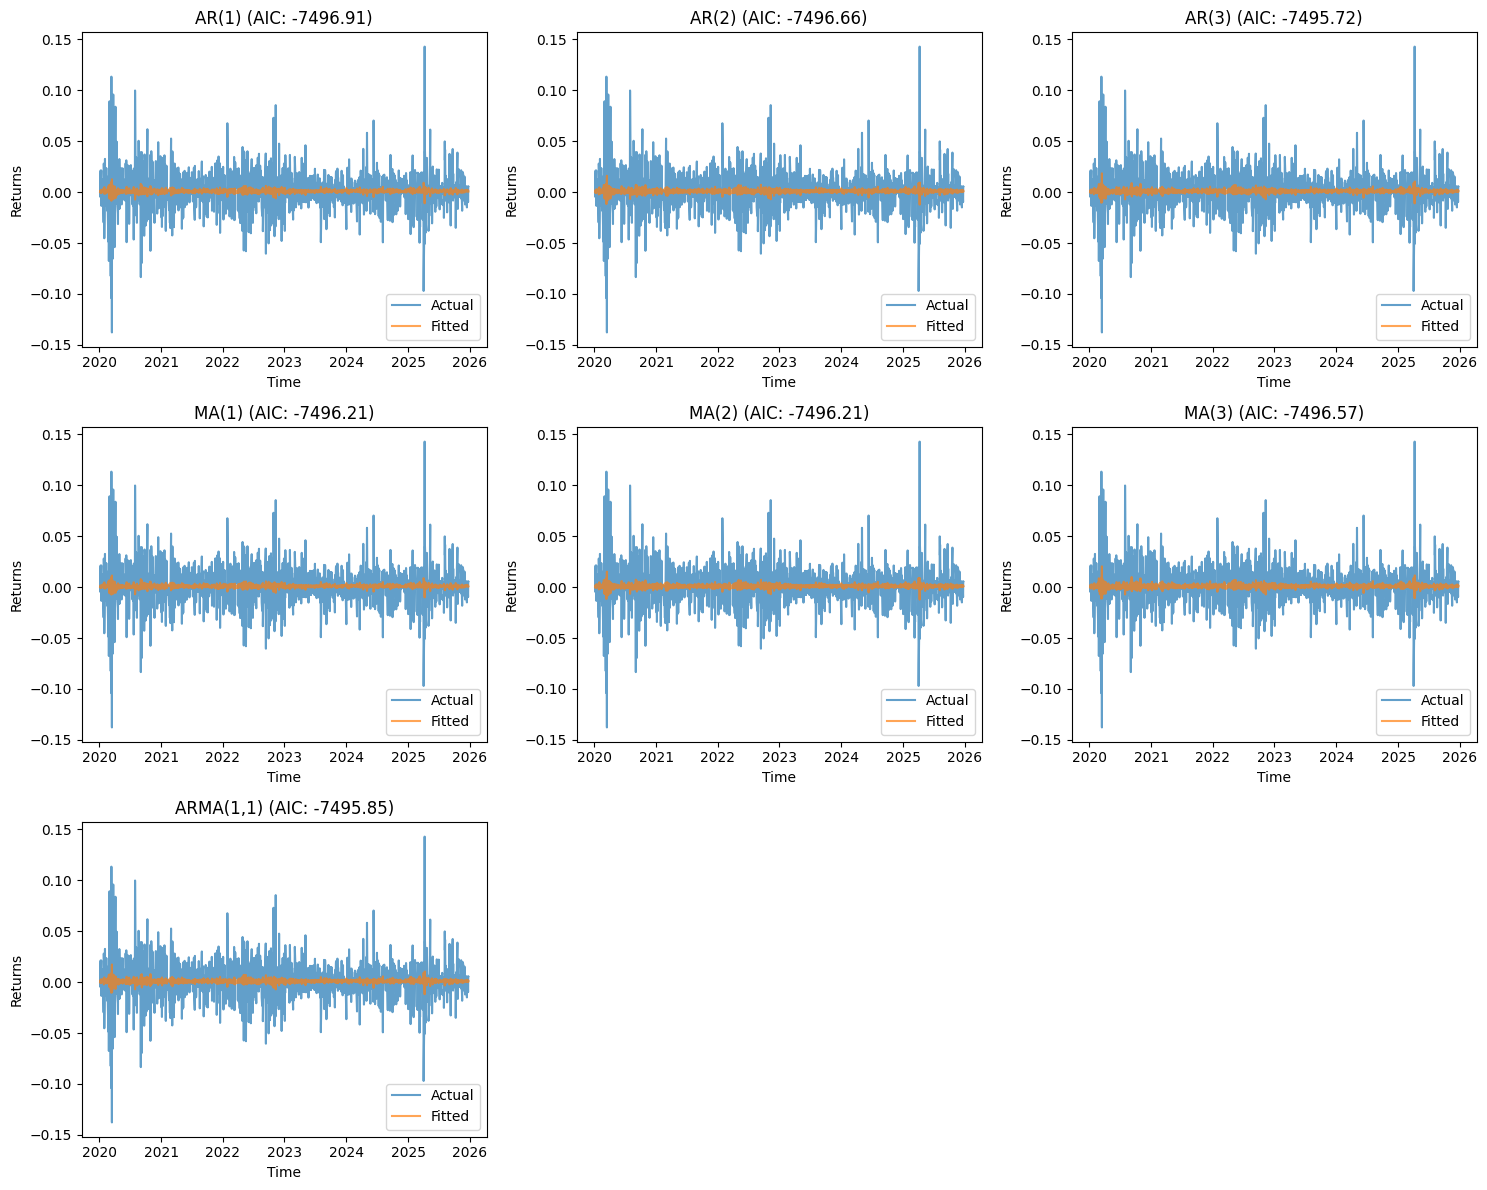

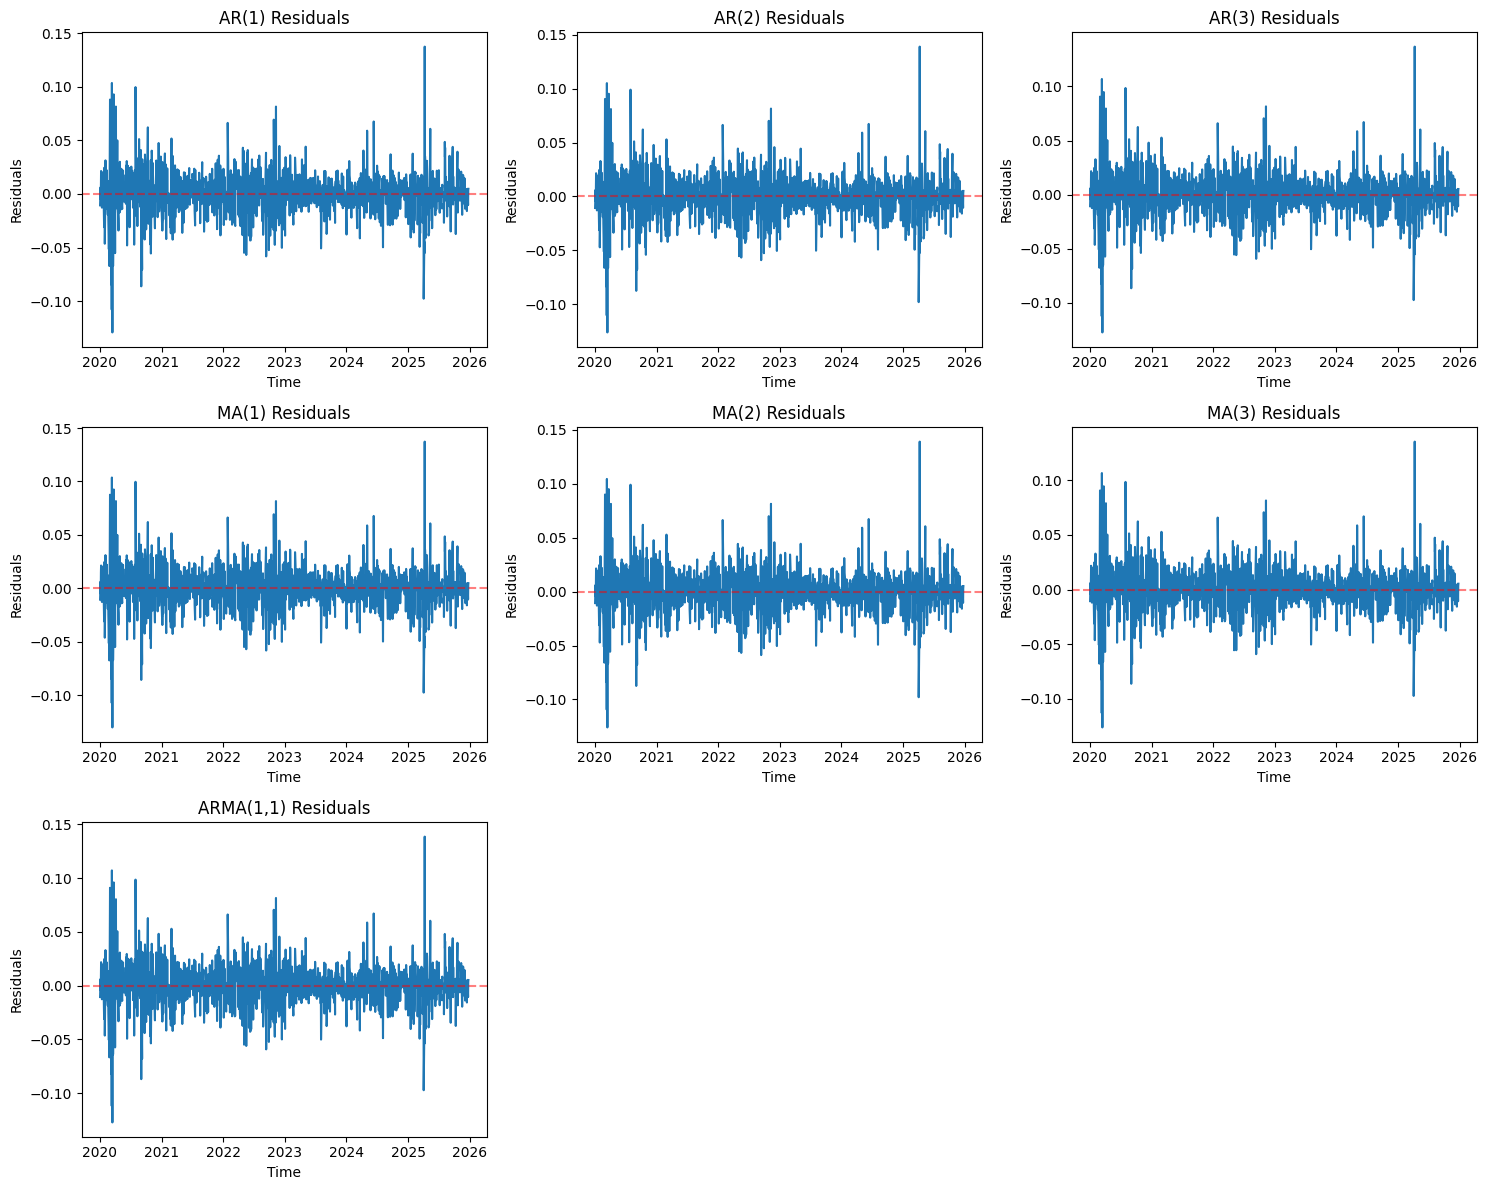


DIAGNOSTICS FOR BEST MODEL: AR(1)
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 1503
Model:                 ARIMA(1, 0, 0)   Log Likelihood                3751.456
Date:                Fri, 26 Dec 2025   AIC                          -7496.912
Time:                        05:08:55   BIC                          -7480.967
Sample:                             0   HQIC                         -7490.973
                               - 1503                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      1.848      0.065   -5.37e-05       0.002
ar.L1         -0.0840      0.015     -5.539      0.000      -0.114      -0.054
sigma2         0.

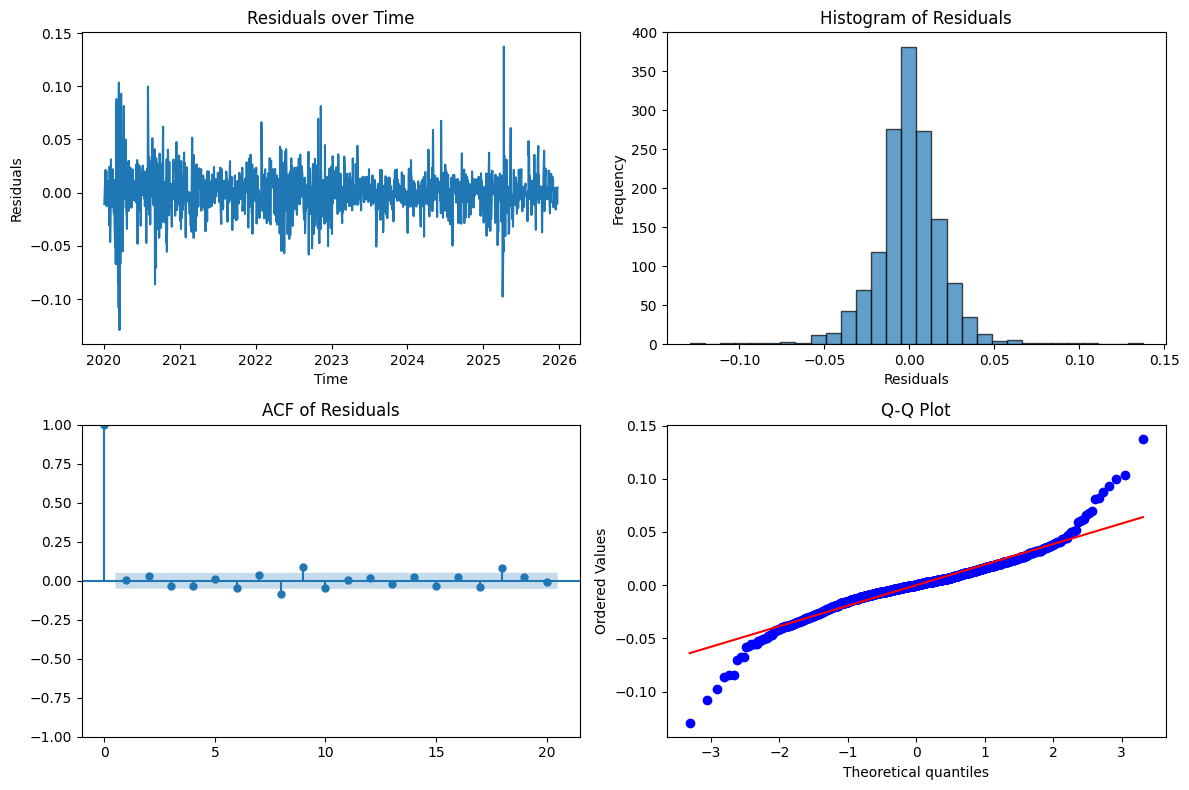


FORECAST COMPARISON (Next 5 periods)

AR(1) Forecast:
  Period 1: 0.000511
  Period 2: 0.000914
  Period 3: 0.000880
  Period 4: 0.000883
  Period 5: 0.000883

AR(2) Forecast:
  Period 1: 0.000668
  Period 2: 0.001050
  Period 3: 0.000861
  Period 4: 0.000889
  Period 5: 0.000881

AR(3) Forecast:
  Period 1: 0.000949
  Period 2: 0.000904
  Period 3: 0.000763
  Period 4: 0.000889
  Period 5: 0.000876

MA(1) Forecast:
  Period 1: 0.000506
  Period 2: 0.000882
  Period 3: 0.000882
  Period 4: 0.000882
  Period 5: 0.000882

MA(2) Forecast:
  Period 1: 0.000593
  Period 2: 0.001076
  Period 3: 0.000882
  Period 4: 0.000882
  Period 5: 0.000882

MA(3) Forecast:
  Period 1: 0.001005
  Period 2: 0.000973
  Period 3: 0.000664
  Period 4: 0.000880
  Period 5: 0.000880

ARMA(1,1) Forecast:
  Period 1: 0.000875
  Period 2: 0.000886
  Period 3: 0.000880
  Period 4: 0.000883
  Period 5: 0.000881

KEY CONCLUSIONS

1. Best model by AIC: AR(1)
   AIC: -7496.91
   BIC: -7480.97

2. Best model by BIC: A

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings('ignore')

df_returns.columns = ['returns'].copy()


# 1. First, let's visualize the data and its ACF/PACF
plt.figure(figsize=(12, 8))

# Plot the returns
plt.subplot(3, 1, 1)
plt.plot(df_returns['returns'])
plt.title('Returns Series')
plt.xlabel('Time')
plt.ylabel('Returns')

# Plot ACF
plt.subplot(3, 1, 2)
plot_acf(df_returns['returns'].dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(3, 1, 3)
plot_pacf(df_returns['returns'].dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# 2. Function to fit and summarize ARIMA model
# Fixed version of the fit_arima_model function
def fit_arima_model(returns, order, model_name):
    """
    Fit ARIMA model and return summary statistics
    """
    try:
        # Fit the model
        model = ARIMA(returns, order=order)
        model_fit = model.fit()

        # Get AIC and BIC
        aic = model_fit.aic
        bic = model_fit.bic

        # Get parameters
        params = model_fit.params
        pvalues = model_fit.pvalues

        # Ljung-Box test for residuals autocorrelation
        lb_test = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True)
        lb_pvalue = lb_test['lb_pvalue'].iloc[0]

        # FIX: Correct RMSE and MAE calculation
        # Use fitted values which align with the actual values
        fitted_values = model_fit.fittedvalues

        # Align actual and fitted values (remove NA from fittedvalues)
        actual_aligned = returns[fitted_values.index]
        fitted_aligned = fitted_values

        # Calculate RMSE and MAE
        rmse = np.sqrt(np.mean((actual_aligned - fitted_aligned)**2))
        mae = np.mean(np.abs(actual_aligned - fitted_aligned))

        return {
            'Model': model_name,
            'Order': order,
            'AIC': aic,
            'BIC': bic,
            'RMSE': rmse,
            'MAE': mae,
            'Ljung-Box p-value': lb_pvalue,
            'Parameters': params,
            'P-values': pvalues,
            'Fitted_Model': model_fit,
            'Residuals': model_fit.resid,
            'Fitted_Values': fitted_values
        }

    except Exception as e:
        print(f"Error fitting {model_name}: {e}")
        return None

# 3. Fit all models
models_to_fit = [
    ((1, 0, 0), 'AR(1)'),
    ((2, 0, 0), 'AR(2)'),
    ((3, 0, 0), 'AR(3)'),
    ((0, 0, 1), 'MA(1)'),
    ((0, 0, 2), 'MA(2)'),
    ((0, 0, 3), 'MA(3)'),
    ((1, 0, 1), 'ARMA(1,1)')
]

results = []
fitted_models = {}

for order, name in models_to_fit:
    print(f"Fitting {name}...")
    result = fit_arima_model(df_returns['returns'].dropna(), order, name)
    if result is not None:
        results.append(result)
        fitted_models[name] = result['Fitted_Model']

# 4. Create comparison DataFrame
comparison_df = pd.DataFrame([{
    'Model': r['Model'],
    'Order': r['Order'],
    'AIC': r['AIC'],
    'BIC': r['BIC'],
    'RMSE': r['RMSE'],
    'MAE': r['MAE'],
    'Ljung-Box p-value': r['Ljung-Box p-value'],
    'Significant Params': sum(r['P-values'] < 0.05)
} for r in results])

# Sort by AIC (lower is better)
comparison_df = comparison_df.sort_values('AIC')

print("\n" + "="*80)
print("MODEL COMPARISON TABLE (Sorted by AIC)")
print("="*80)
print(comparison_df.to_string(index=False))

# 5. Display detailed parameter results for each model
print("\n" + "="*80)
print("DETAILED PARAMETER RESULTS")
print("="*80)

for r in results:
    print(f"\n{r['Model']} Parameters:")
    print("-" * 40)

    # Create a DataFrame for parameters
    params_df = pd.DataFrame({
        'Parameter': r['Parameters'].index,
        'Value': r['Parameters'].values,
        'P-value': r['P-values'].values,
        'Significant': r['P-values'] < 0.05
    })
    print(params_df.to_string(index=False))

# 6. Visual comparison of model fits
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, (model_name, model_fit) in enumerate(fitted_models.items()):
    if idx < len(axes):
        # Plot actual vs fitted
        ax = axes[idx]
        actual = df_returns['returns'].dropna()
        fitted = model_fit.predict(start=1, end=len(actual))

        ax.plot(actual.index[1:], actual.values[1:], label='Actual', alpha=0.7)
        ax.plot(actual.index[1:], fitted.values[1:], label='Fitted', alpha=0.7)
        ax.set_title(f'{model_name} (AIC: {model_fit.aic:.2f})')
        ax.legend()
        ax.set_xlabel('Time')
        ax.set_ylabel('Returns')

# Hide unused subplots
for idx in range(len(fitted_models), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# 7. Residual analysis
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, r in enumerate(results):
    if idx < len(axes):
        ax1 = axes[idx]

        # Plot residuals
        residuals = r['Residuals']
        ax1.plot(residuals.index, residuals.values)
        ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)
        ax1.set_title(f"{r['Model']} Residuals")
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Residuals')

# Hide unused subplots
for idx in range(len(results), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# 8. Diagnostic plots for the best model (lowest AIC)
best_model_info = min(results, key=lambda x: x['AIC'])
best_model = best_model_info['Fitted_Model']

print("\n" + "="*80)
print(f"DIAGNOSTICS FOR BEST MODEL: {best_model_info['Model']}")
print("="*80)

# Summary of best model
print(best_model.summary())

# Diagnostic plots
fig = plt.figure(figsize=(12, 8))

# Residuals
ax1 = plt.subplot(2, 2, 1)
ax1.plot(best_model.resid)
ax1.set_title('Residuals over Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Residuals')

# Histogram of residuals
ax2 = plt.subplot(2, 2, 2)
ax2.hist(best_model.resid, bins=30, edgecolor='black', alpha=0.7)
ax2.set_title('Histogram of Residuals')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')

# ACF of residuals
ax3 = plt.subplot(2, 2, 3)
plot_acf(best_model.resid.dropna(), lags=20, ax=ax3)
ax3.set_title('ACF of Residuals')

# Q-Q plot
ax4 = plt.subplot(2, 2, 4)
from scipy import stats
stats.probplot(best_model.resid.dropna(), dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

# 9. Compare forecasts (if you want to forecast)
print("\n" + "="*80)
print("FORECAST COMPARISON (Next 5 periods)")
print("="*80)

forecast_horizon = 5
forecasts = {}

for name, model_fit in fitted_models.items():
    forecast = model_fit.forecast(steps=forecast_horizon)
    forecasts[name] = forecast
    print(f"\n{name} Forecast:")
    for i, value in enumerate(forecast):
        print(f"  Period {i+1}: {value:.6f}")

# 10. Print key conclusions
print("\n" + "="*80)
print("KEY CONCLUSIONS")
print("="*80)

print(f"\n1. Best model by AIC: {comparison_df.iloc[0]['Model']}")
print(f"   AIC: {comparison_df.iloc[0]['AIC']:.2f}")
print(f"   BIC: {comparison_df.iloc[0]['BIC']:.2f}")

print(f"\n2. Best model by BIC: {comparison_df.sort_values('BIC').iloc[0]['Model']}")
print(f"   AIC: {comparison_df.sort_values('BIC').iloc[0]['AIC']:.2f}")
print(f"   BIC: {comparison_df.sort_values('BIC').iloc[0]['BIC']:.2f}")

print(f"\n3. Best model by RMSE: {comparison_df.sort_values('RMSE').iloc[0]['Model']}")
print(f"   RMSE: {comparison_df.sort_values('RMSE').iloc[0]['RMSE']:.6f}")

# Check for white noise in best model residuals
print(f"\n4. Residual diagnostics for best model ({best_model_info['Model']}):")
print(f"   Ljung-Box p-value: {best_model_info['Ljung-Box p-value']:.4f}")
if best_model_info['Ljung-Box p-value'] > 0.05:
    print("   ✓ Residuals appear to be white noise (no autocorrelation)")
else:
    print("   ✗ Residuals show significant autocorrelation")

# Parameter significance
sig_params = sum(best_model_info['P-values'] < 0.05)
total_params = len(best_model_info['P-values'])
print(f"\n5. Parameter significance for best model:")
print(f"   {sig_params} out of {total_params} parameters are significant (p < 0.05)")